## Multiple Linear Regression

#### Author: Hao Zheng

A regression is among one of the most commonly used methods when it comes to analysts trying to describe the result of an event, such as the effect of different characteristics on housing prices, which is what we are going to focus on in this Notebook. We encourage you to create your own Jupytor Notebook and follow along. You can also download this Notebook together with the accompanying data in the [Notebooks and Data](https://github.com/Master-of-Business-Analytics/Notebooks_and_Data) GitHub Repository. Alternatively, if you do not have Python or Jupyter Notebook installed yet, you may experiment with a virtual Notebook by launching Binder or Syzygy below (learn more about these two tools in the [Resource](https://analytics-at-sauder.github.io/resource.html) tab). 

<a href="https://ubc.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_16_MLR&urlpath=tree%2FProject_16_MLR%2Fp16_mlr.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (UBC)</a>

<a href="https://pims.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_16_MLR&urlpath=tree%2FProject_16_MLR%2Fp16_mlr.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (Google)</a>

<a href="https://mybinder.org/v2/gh/Analytics-at-Sauder/Project_16_MLR/master?filepath=p16_mlr.ipynb" target="_blank" class="button">Launch Binder</a>

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib as plot
import seaborn as sns
import itertools

First, let's look at the data to see what variables we are working with.

In [7]:
raw_df = pd.read_csv("data/train.csv")
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#Number of columns in the dataframe(-2 due to sales price and id feature in the column)
num_feature = len(raw_df.columns) -2

In [10]:
#Check the uniqueness of each variable so that we can further select the feature in the dataframe
info = raw_df.agg(['count', 'size', 'nunique'])

In [17]:
#Also we can check the types of these variables since there are both qualitative variables and quantitative 
#variables in the dataset
print(raw_df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

There are more than enough variables in the dataframe to perform regression analyses. In reality, we usually use the variables that can best explain the changes in housing prices, which is our variable of interest. We can plot some of these variables to see if there are any relationships between them.

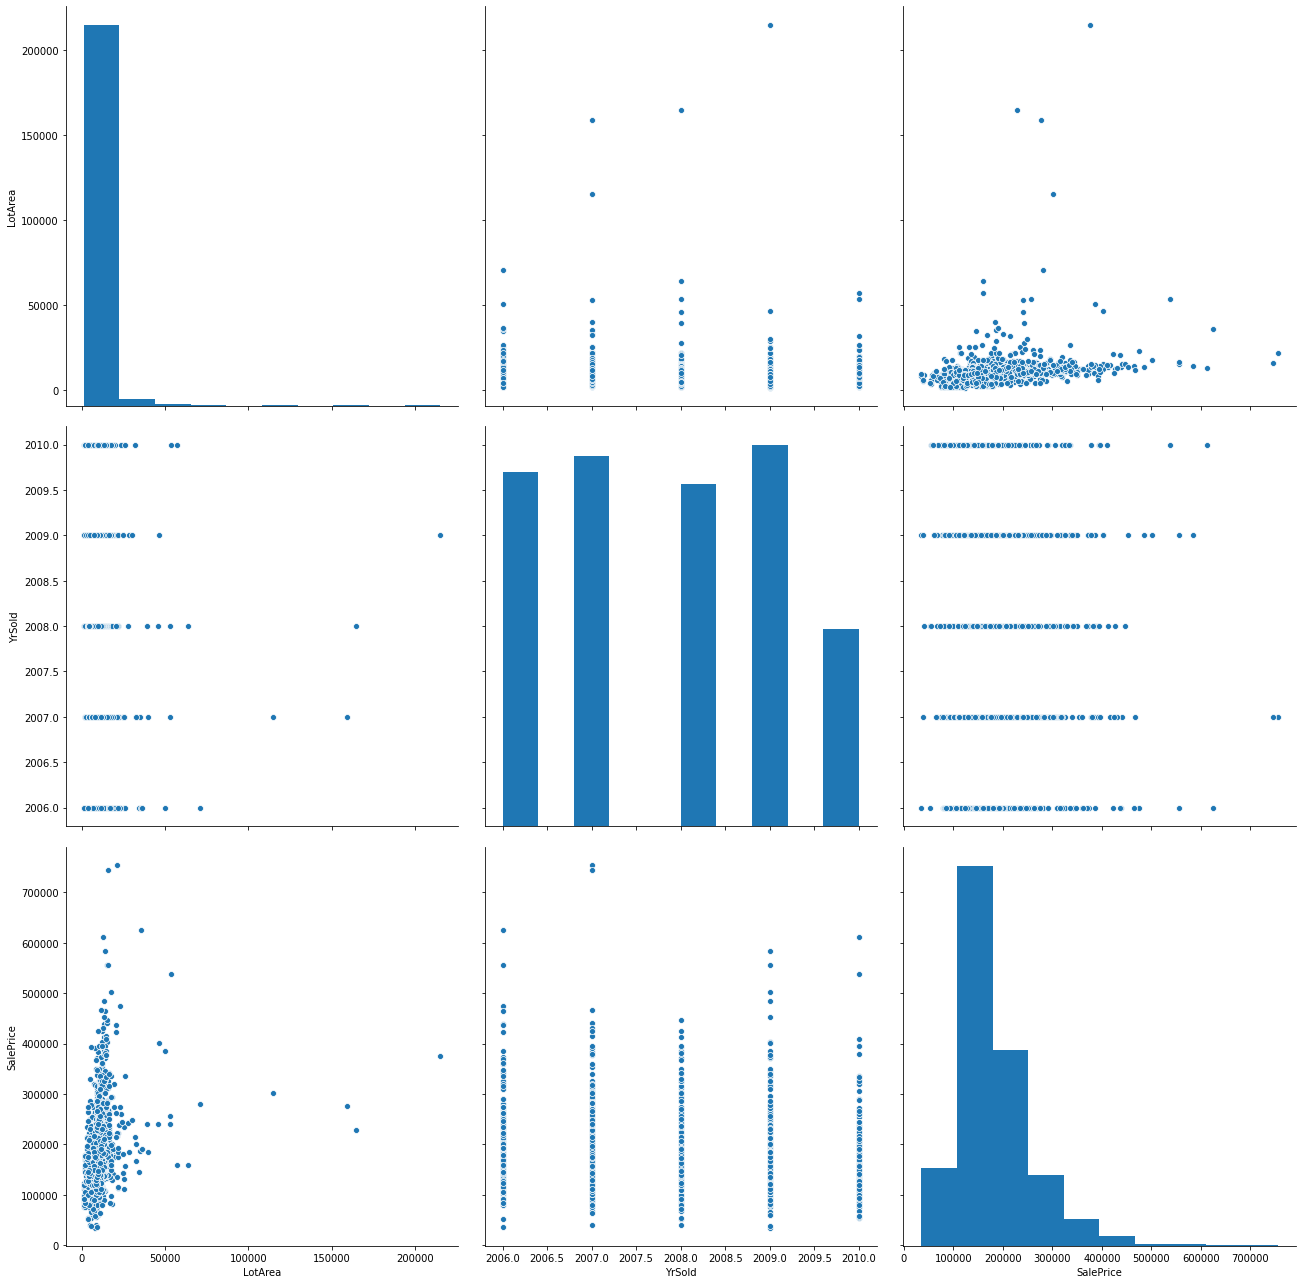

In [23]:
#Seaborn plot
g = sns.pairplot(raw_df[['LotArea','YrSold','SalePrice']], palette='tab20',size=6)

We expect to see a positive relationship between SalePrice and LotArea. The relationship between the two is not as significant as we expected because of the influence of the outliers. To further explore this relationship, we can try to remove all the data points within the lotarea variable that are larger than 50,000 in order to eliminate the outliers that are impacting our analysis. We will not be doing further data exploration in this Notebook.

### Step 1: Include two sample features within the dataframe

In [1]:
# Include the LotArea and the YrSold features as x-values, include SalePrice as y-value
x = raw_df.loc[:,['LotArea','YrSold']].values.tolist()
y = list(map(int,raw_df["SalePrice"].tolist()))
x, y = np.array(x), np.array(y)

NameError: name 'raw_df' is not defined

In [62]:
model = LinearRegression().fit(x, y)
# Get r squared value
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Get intercept
print('intercept:', model.intercept_)

# Get coefficients
print('coefficients:', model.coef_)


coefficient of determination: 0.07024646007626767
intercept: 3181205.713858099
coefficients: [    2.09711551 -1505.28728351]


The coefficient indicates that there is something wrong here in the model. The coefficient associated with the year is negative. But in real life, we are witnessing a huge increase in housing prices every year. Therefore, we need to further search for the appropriate features to include in the model.

### Step 2 : Try different possiblity with the model

After the first failure, we can try two methods to improve the model: either add in more variables to help explain the model, or just remove some of the variables from the model. Here, in the second step we would try to remove YrSold's influence from the model. Before we do that, we need to make sure it is a wise decision. We will see if YrSold shares a similar positive linear relationship with LotArea in responding to SalePrice.

In [44]:
#Create a new dataframe
fix_lotarea = np.average(raw_df.loc[:,'LotArea'])
LotArea = itertools.repeat(fix_lotarea, len(raw_df))
YrSold = raw_df["YrSold"].tolist()
new_df = pd.DataFrame(list(zip(LotArea, YrSold)), 
               columns =['LotArea', 'YrSold'])

In [45]:
#Create the model again and check the coefficient
x = new_df.loc[:,['LotArea','YrSold']].values.tolist()
y = list(map(int,raw_df["SalePrice"].tolist()))
x, y = np.array(x), np.array(y)
model = LinearRegression().fit(x, y)
# Get r squared value
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Get intercept
print('intercept:', model.intercept_)

# Get coefficients
print('coefficients:', model.coef_)

coefficient of determination: 0.0008365159328428406
intercept: 3656994.3109081727
coefficients: [-2.31433421e-01 -1.73005873e+03]


From the coefficient on YrSold, we can see that it is actually not changing the SalePrice. Therefore, we can move forward to remove this unhelpful variable in trying to explain the variations observed in SalePrice. We can also, potentially, add in more powerful variables into the model.

### More Practice

This Notebook serves as a basic introduction to how we can build a MLR model using Python, and how we can add or remove variables from it. There are more than enough variables in the accompanying data that you can play with this raw dataframe. Feel free to pick other variables and create your own sales price forecast model to reach higher coefficients of determination (R sqaure).